# Portfolio Selection

*Efficient Diversification of Investments*

Lets have a look at the Portfolio Selection by Harry M. Markowitz and how we can use it to construct a portfolio.

Harry Markowitz is a Nobel Memorial Prize-winning economist who devised the modern portfolio theory in 1952. He describes different techniques for analysis of portfolios of securities. Modern portfolio theory argues that an investment's risk and return characteristics should not be viewed alone, but should be evaluated by how the investment affects the overall portfolio's risk and return.

#### Exploring the Efficient Frontier

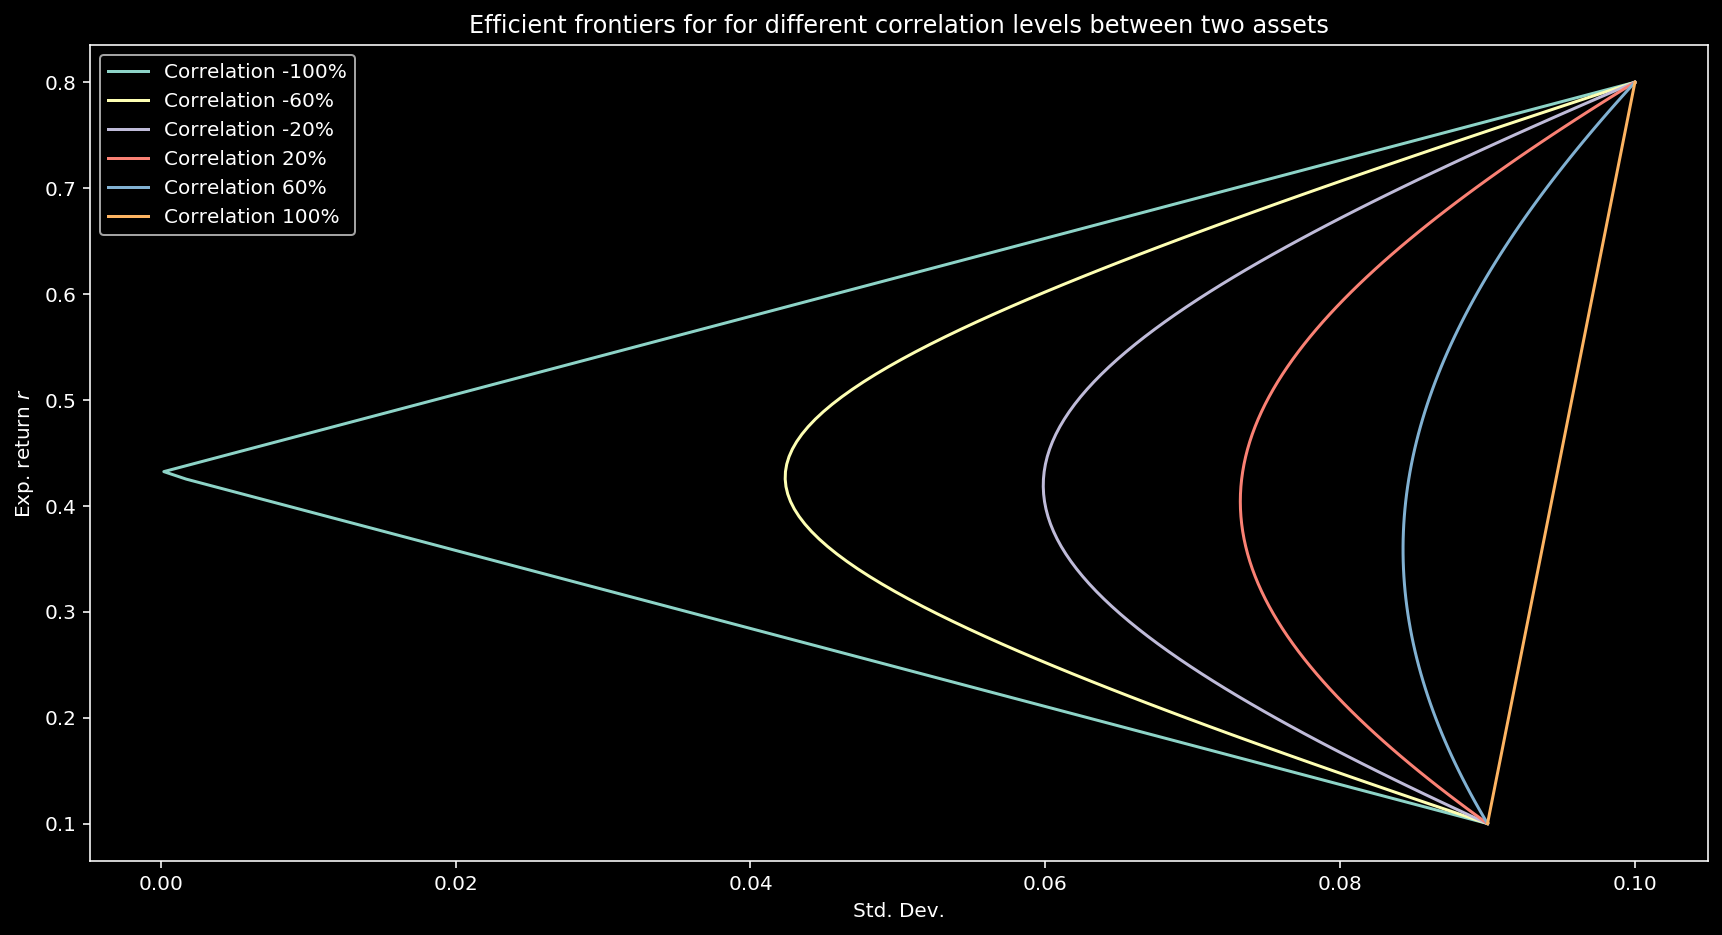

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
#%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from IPython.core.pylabtools import figsize
figsize(14.5, 7.5)

r_a = 0.10
r_b = 0.8
stdev_a = 0.09
stdev_b = 0.10


for correl in np.linspace(-1,1,6):
    X, Y = [], []
    for w_a in np.linspace(0,1,100):
        w_b = 1 - w_a
        r = r_a * w_a + r_b * w_b
        var = w_a**2 * stdev_a**2 + w_b**2 * stdev_b**2 + 2*w_a*w_b*stdev_a*stdev_b*correl
        stdev = np.sqrt(var)
        X.append(stdev)
        Y.append(r)
    plt.plot(X,Y,label='Correlation %0.0f%%' % (100*correl))

plt.xlabel('Std. Dev.'), plt.ylabel('Exp. return $r$')
plt.title('Efficient frontiers for for different correlation levels between two assets')
plt.legend();

####  Top Absolute Correlations

To understand the role of correlations and efficient diversification we analyse the correlations of returns from stocks listed in the dow jones.

In [2]:
import sys
sys.path.insert(0, '../../scripts/')

from database import Stock

import numpy as np
import datetime as dt
import pandas as pd
pd.set_option('display.max_rows', None)
from pandas_datareader import data as pdr
from yahoo_fin import stock_info as si

import warnings
warnings.filterwarnings("ignore")

num_of_years = 1
start = dt.date.today() - dt.timedelta(days = int(365.25*num_of_years))
end = dt.date.today()

tickers = si.tickers_dow()

In [3]:
tmp_ = dict()

for tic in tickers:
    stk = Stock(tic, start, end).df
    tmp_[tic] = stk["Close"]

In [4]:
dow_data = pd.DataFrame(tmp_)
stk_rets  = np.log(dow_data/dow_data.shift(1)).dropna()

In [5]:
print('\nCorrelation Matrix')
corr_matrix = stk_rets.corr()
print (corr_matrix)


Correlation Matrix
          AAPL      AMGN       AXP        BA       CAT       CRM      CSCO  \
AAPL  1.000000  0.611059  0.497994  0.474272  0.462186  0.646533  0.646835   
AMGN  0.611059  1.000000  0.442167  0.298884  0.505070  0.511003  0.635543   
AXP   0.497994  0.442167  1.000000  0.753741  0.723743  0.441249  0.615063   
BA    0.474272  0.298884  0.753741  1.000000  0.593188  0.403137  0.503387   
CAT   0.462186  0.505070  0.723743  0.593188  1.000000  0.393849  0.652038   
CRM   0.646533  0.511003  0.441249  0.403137  0.393849  1.000000  0.532795   
CSCO  0.646835  0.635543  0.615063  0.503387  0.652038  0.532795  1.000000   
CVX   0.477622  0.444608  0.803239  0.693905  0.678595  0.424568  0.556308   
DIS   0.514907  0.424618  0.766530  0.648243  0.678683  0.465892  0.637953   
DOW   0.481452  0.463380  0.717221  0.626296  0.811200  0.470107  0.594225   
GS    0.590335  0.511770  0.846864  0.693605  0.739910  0.493128  0.646529   
HD    0.688560  0.614576  0.629708  0.604171

In [6]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr

print("\nTop Absolute Correlations")
print(get_top_abs_correlations(stk_rets))


Top Absolute Correlations
GS    JPM     0.892534
AXP   JPM     0.890467
      HON     0.864769
      GS      0.846864
AAPL  MSFT    0.838091
HON   JPM     0.825684
AXP   V       0.813118
CAT   DOW     0.811200
HON   V       0.809528
CVX   JPM     0.806027
GS    HON     0.804969
AXP   CVX     0.803239
MCD   V       0.796315
CVX   HON     0.791154
HD    MCD     0.784219
JNJ   PG      0.784209
JPM   TRV     0.781530
CAT   HON     0.778545
MSFT  V       0.775911
HON   KO      0.770098
      MMM     0.768201
AXP   DIS     0.766530
CVX   GS      0.766203
CAT   JPM     0.763466
JPM   V       0.763213
DIS   HON     0.760907
NKE   V       0.758683
JNJ   MRK     0.757819
HD    MSFT    0.757617
IBM   MMM     0.756849
AXP   BA      0.753741
CRM   MSFT    0.752712
DOW   JPM     0.751507
CVX   V       0.748595
IBM   KO      0.748158
MCD   NKE     0.745838
UNH   V       0.745703
CAT   MMM     0.745171
HON   IBM     0.744000
CSCO  IBM     0.742658
DIS   V       0.741142
PG    VZ      0.741039
BA    H

**Compare the high and low**

In [7]:
get_top_abs_correlations(stk_rets).head()

GS    JPM     0.892534
AXP   JPM     0.890467
      HON     0.864769
      GS      0.846864
AAPL  MSFT    0.838091
dtype: float64

In [8]:
get_top_abs_correlations(stk_rets).tail()

HON  WMT    0.282734
AXP  WMT    0.262223
CVX  WMT    0.236100
CRM  WBA    0.227412
BA   WMT    0.189119
dtype: float64

Text(0, 0.5, 'JPMorgan Chase & Co.')

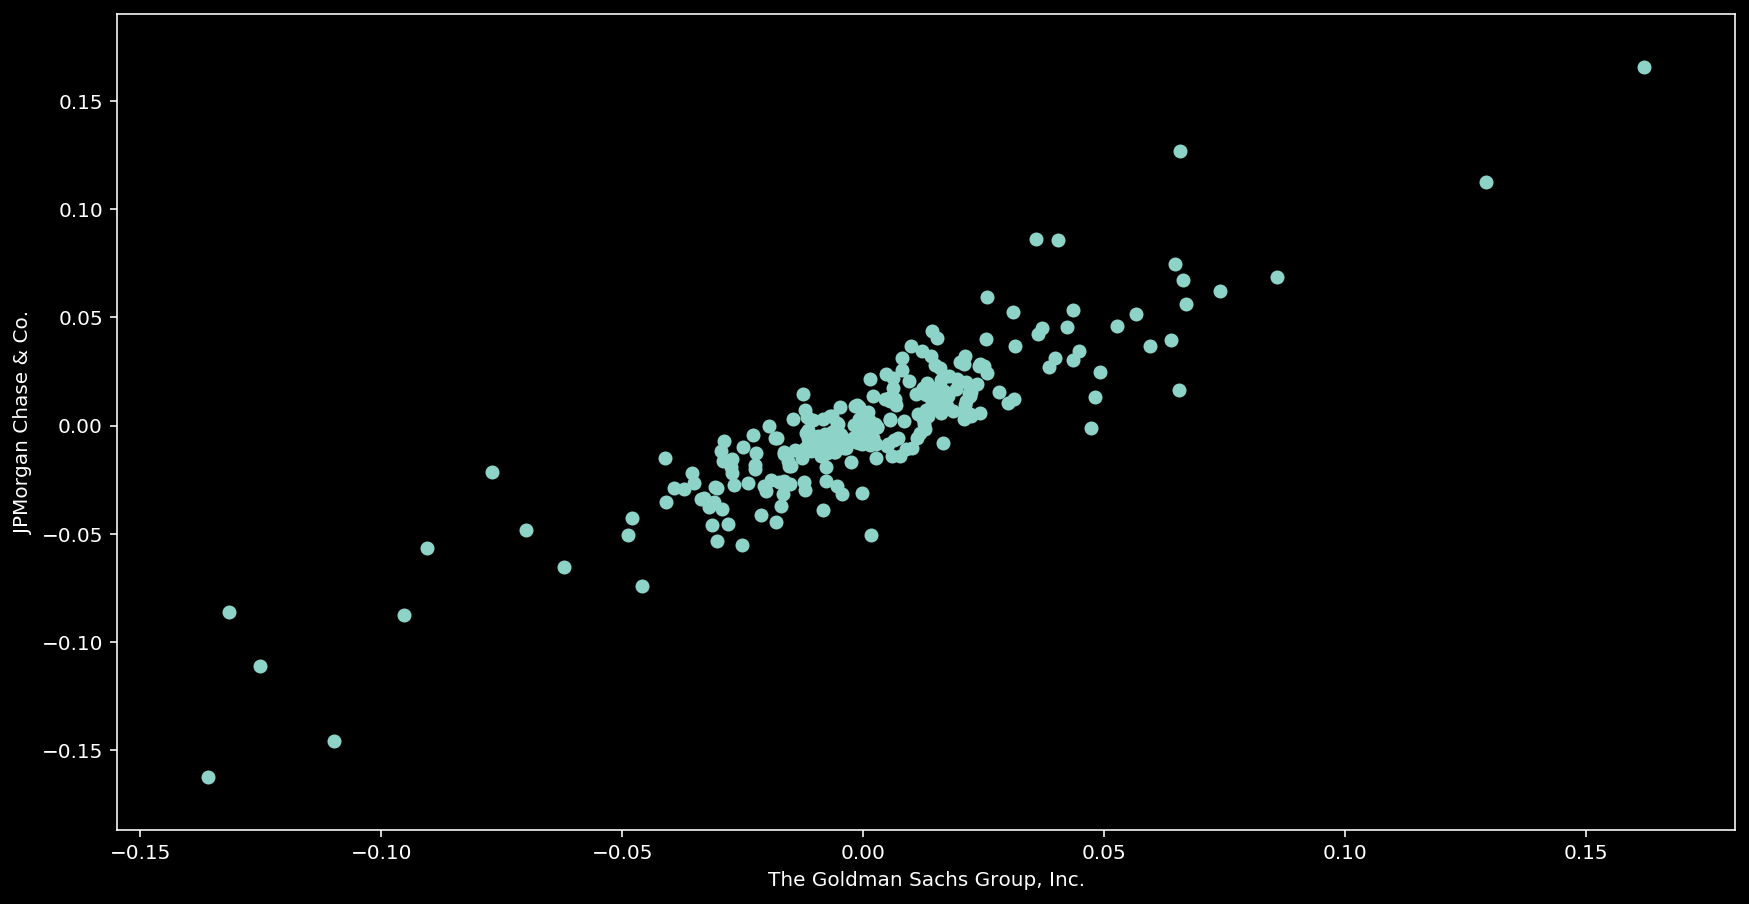

In [9]:
plt.scatter(stk_rets.GS, stk_rets.JPM);
plt.xlabel('The Goldman Sachs Group, Inc.')
plt.ylabel('JPMorgan Chase & Co.')

Text(0, 0.5, 'Walmart Inc.')

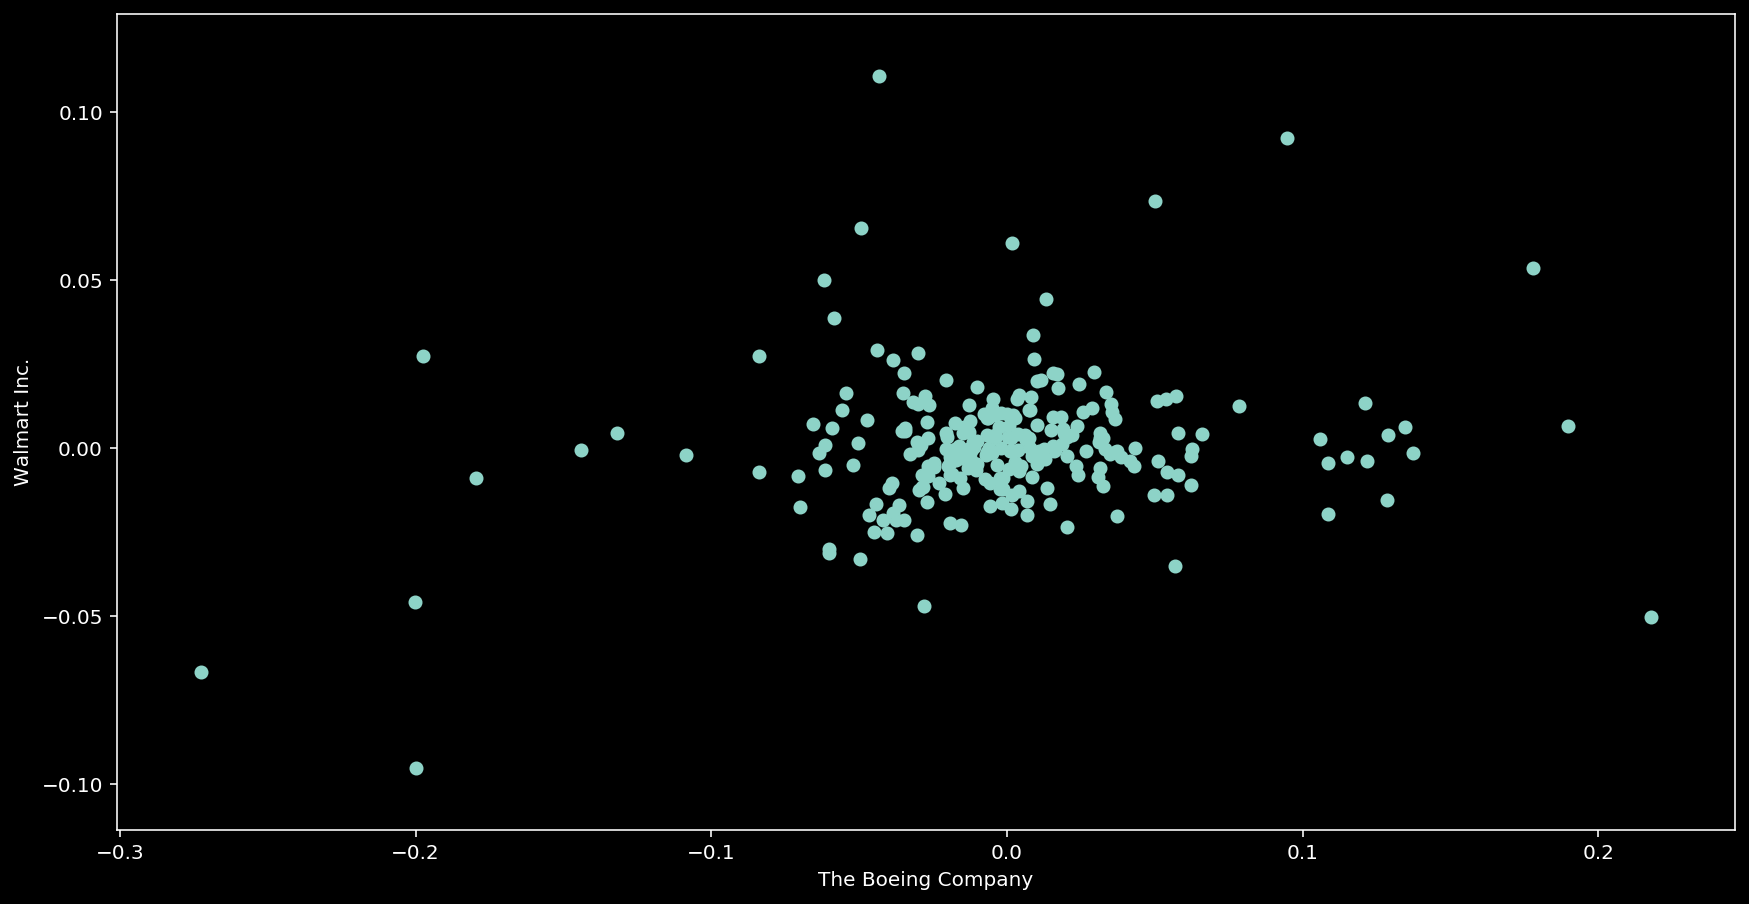

In [10]:
plt.scatter(stk_rets.BA, stk_rets.WMT);
plt.xlabel('The Boeing Company')
plt.ylabel('Walmart Inc.')

### Risk and Return

based on the mean and the standard deviation of the stock return we are going to compare the risk and the return.


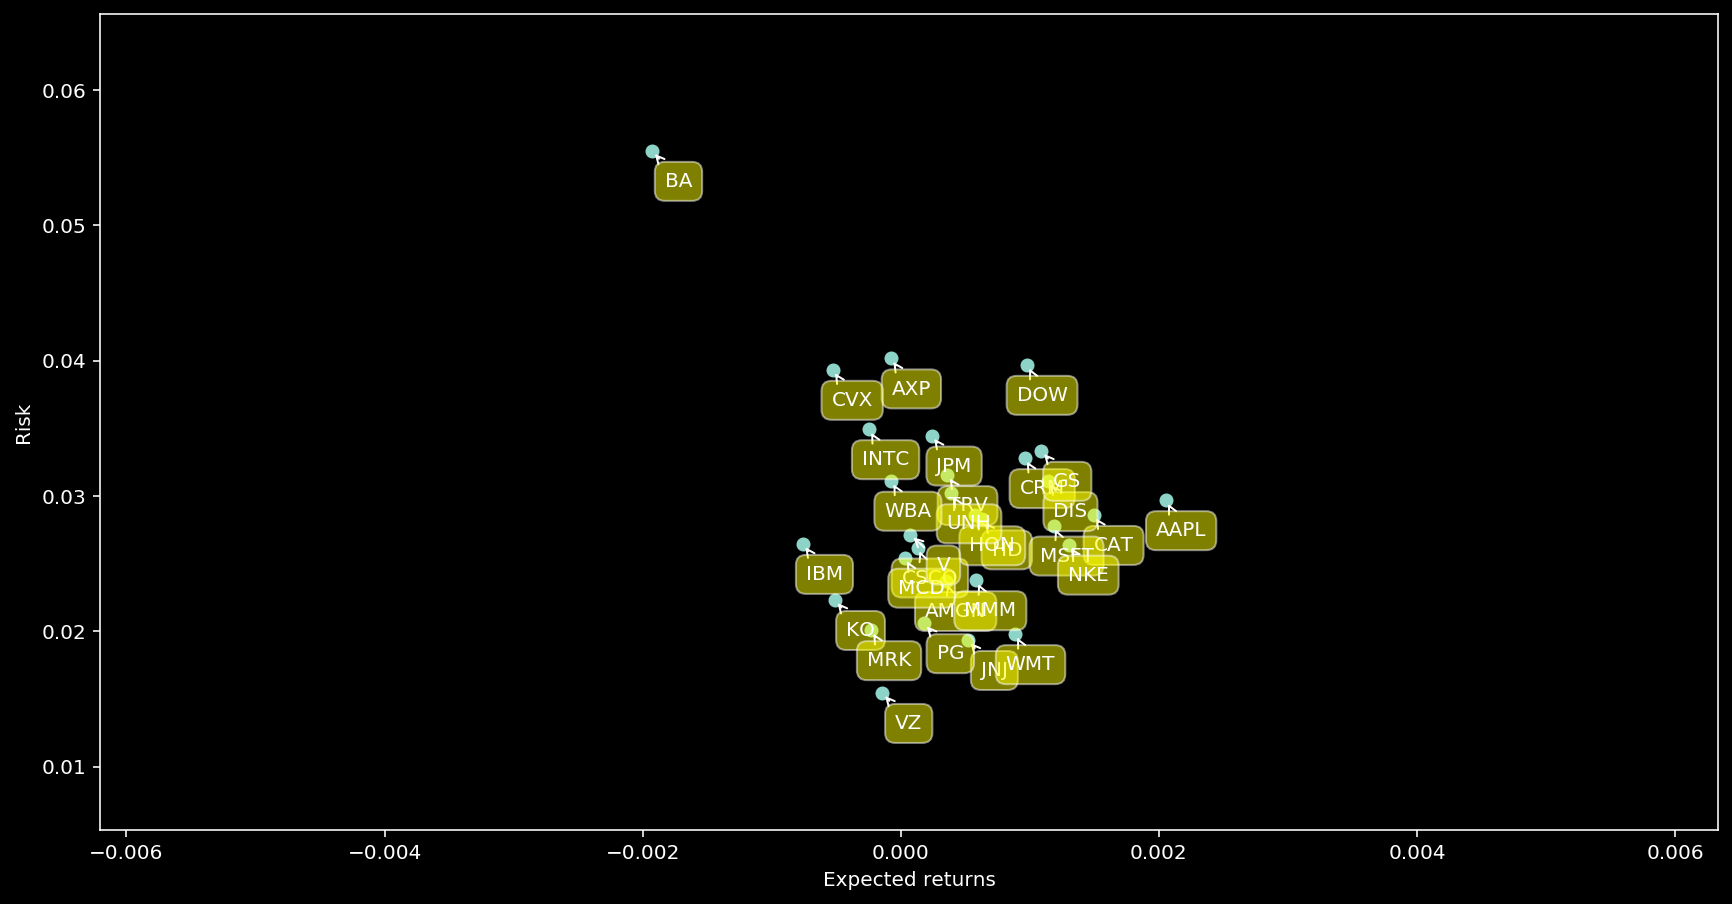

In [11]:
plt.scatter(stk_rets.mean(), stk_rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(stk_rets.columns, stk_rets.mean(), stk_rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

### Value at Risk

Value at risk (VaR) is a statistic used to try and quantify the level of financial risk within a firm or portfolio over a specified time frame. VaR provides an estimate of the maximum loss from a given position or portfolio over a period of time, and you can calculate it across various confidence levels.


So lets imagine we buy every stock in the dow jones one time and then just hold it.

In [12]:
weight=np.array([  1,  1,  1,  1,  1,  1,  1,  1,  1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

t = np.sum(weight)
weights = weight/t

In [13]:
weights

array([0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333])

we start one year ago and take the sum of all stocks to get the intial investment in $

In [14]:
initial_investment = np.sum(dow_data.iloc[1])
initial_investment

4340.65

In [15]:
#initial_investment = 4340.65

returns = dow_data.pct_change()
cov_matrix = returns.cov()

# Calculate mean returns for each stock
avg_rets = returns.mean()

# Calculate mean returns for portfolio overall, 
# using dot product to 
# normalize individual means against investment weights
port_mean = avg_rets.dot(weights)

# Calculate portfolio standard deviation
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))

# Calculate mean of investment
mean_investment = (1+port_mean) * initial_investment    

# Calculate standard deviation of investmnet
stdev_investment = initial_investment * port_stdev

# Select our confidence interval (I'll choose 95% here)
conf_level1 = 0.05

# Using SciPy ppf method to generate values for the
# inverse cumulative distribution function to a normal distribution
# Plugging in the mean, standard deviation of our portfolio
from scipy.stats import norm
cutoff1 = norm.ppf(conf_level1, mean_investment, stdev_investment)

#Finally, we can calculate the VaR at our confidence interval
var_1d1 = initial_investment - cutoff1
print(var_1d1)

158.35313170452446


1 day VaR @ 95% confidence: 158.35
2 day VaR @ 95% confidence: 223.95
3 day VaR @ 95% confidence: 274.28
4 day VaR @ 95% confidence: 316.71
5 day VaR @ 95% confidence: 354.09


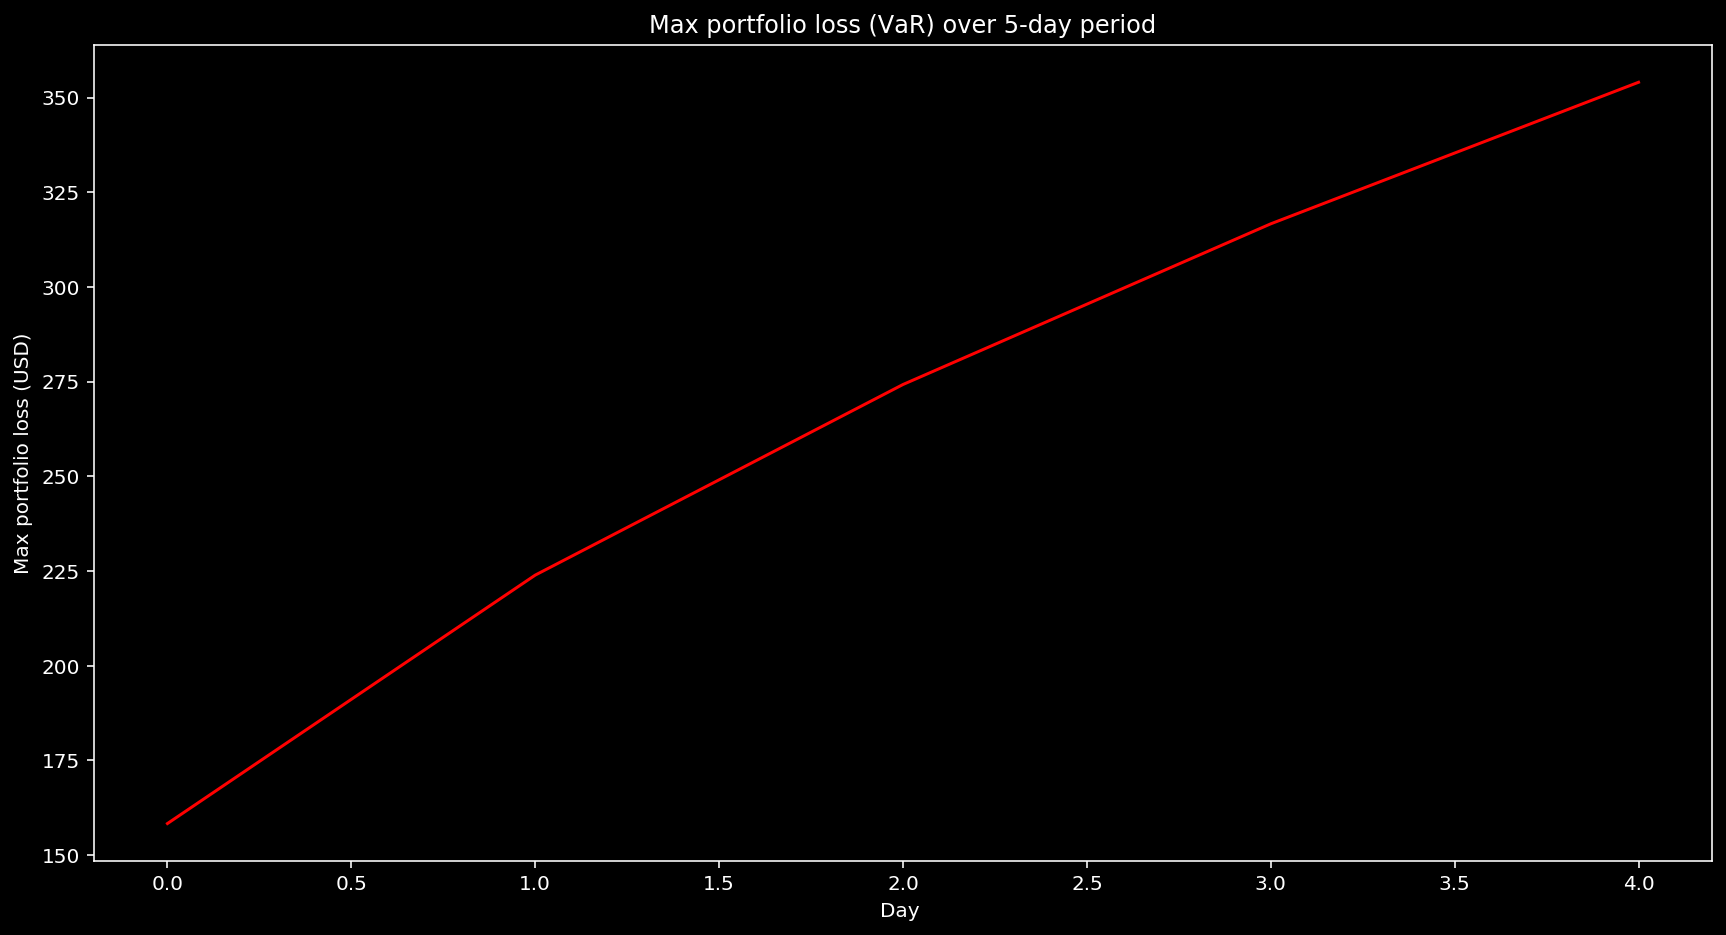

In [16]:
# Calculate n Day VaR
var_array = []
num_days = int(5)
for x in range(1, num_days+1):    
    var_array.append(np.round(var_1d1 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * np.sqrt(x),2)))

plt.xlabel("Day ")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 5-day period")
plt.plot(var_array, "r")